#Data : Walmart Sales Dataset of 45stores
* Walmart의 2010-2012년 동안 45개 매장의 주간 판매에 대한 데이터 입니다.
*   Data from: https://www.kaggle.com/datasets/varsharam/walmart-sales-dataset-of-45stores

##1.데이터 둘러보기

* 기본 패키지 불러오기

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

* 데이터 불러오기

In [2]:
#구글 드라이브 마운트하기(이미 되어있다면 건너뛴다)
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
wal = pd.read_csv("/content/drive/MyDrive/Raw데이터(kaggle)/Walmart Sales Dataset of 45stores/walmart-sales-dataset-of-45stores.csv")

In [119]:
wal2 = pd.read_csv("/content/drive/MyDrive/Raw데이터(kaggle)/Walmart Sales Dataset of 45stores/walmart-sales-dataset-of-45stores - 복사본.csv")

In [ ]:
wal.head(5)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,date_year,date_month,date_day
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,02,05
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,02,12
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02,19
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02,26
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,03,05


<컬럼 설명>

* Store : 메장 번호
* Date : 날짜
* Weekly_Sales : 해당 주 매장 매출
* Holiday_Flag : 그주에 공휴일이 있는지 없는지 (1이면 휴일이 있고, 0이면 휴일이 없다)
* Temperature  : 그 주 평균 온도(°F)
* Fuel_Price  : 해당 지역 기름값
* CPI : 고객 물가 지수
* Unemployment  : 지역 실업률


* 데이터 기본 정보 확인하기

In [ ]:
wal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


* 데이터의 통계치 확인하기

In [ ]:
wal.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


* 데이터 내용 정리

In [ ]:
print("총 데이터 수 : ",wal.shape[0]*wal.shape[1])
print("총 결측치 수 : {} = 전체 데이터의 {:.2f}% ".format(wal.isnull().sum().sum(),(wal.isnull().sum().sum()*100)/wal.shape[0]*wal.shape[1]))
print("중복 데이터의 수는 : {}".format(wal.duplicated().sum()))

총 데이터 수 :  51480
총 결측치 수 : 0 = 전체 데이터의 0.00% 
중복 데이터의 수는 : 0


##2.질문하기
* 년, 월 판매량의 추세는 어떻게 될까?
* 매장별 평균판매량 순위가 어떻게 될까?
* 기온에 따라 기름값은 어떤 관계가 있을까?
* 휴일이 있던 주와 없던 주에 판매량은 얼마낮 증가하였나?
* 실업률에 대한 매출변화는 어떠한가?
* 각 컬럼에 대한 상관계수 구하기

##3.데이터 정비하기

* 칼럼명 바꾸기

In [ ]:
wal.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [19]:
# 전부 소문자로 변경한다
wal.columns = wal.columns.str.lower()

* 'date' 컬럼 수정 / 변형

In [20]:
# 년 컬럼 생성
wal['date_year'] = wal['date'].str[6:]
# 월 컬럼 생성
wal['date_month'] = wal['date'].str[3:5]
#일 컬럼 생성
wal['date_day'] = wal['date'].str[0:2]

In [21]:
# 'date' 컬럼 수정
wal['date'] = wal['date_year'] +wal['date_month'] +wal['date_day']
# 'date' 컬럼 날짜 형식으로 변환
wal['date'] = pd.to_datetime(wal['date'])

In [22]:
# 해당일이 몇주차인지 확인하기
wal['week'] = wal['date'].map(lambda x:x.isocalendar()[1])

In [ ]:
wal.head(3)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,date_year,date_month,date_day,week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,02,05,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,02,12,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02,19,7


In [24]:
wal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   date          6435 non-null   int64  
 2   weekly_sales  6435 non-null   float64
 3   holiday_flag  6435 non-null   int64  
 4   temperature   6435 non-null   float64
 5   fuel_price    6435 non-null   float64
 6   cpi           6435 non-null   float64
 7   unemployment  6435 non-null   float64
 8   date_year     6435 non-null   object 
 9   date_month    6435 non-null   object 
 10  date_day      6435 non-null   object 
 11  week          6435 non-null   int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 603.4+ KB


In [23]:
wal['date'] = wal['date'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


In [8]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import mean_squared_error, r2_score 

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [90]:
y_target = wal['weekly_sales']
X_data = wal.drop(['weekly_sales'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state=42)

In [91]:
#rf1 = RandomForestRegressor(random_state=42, n_estimators=100)
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
rf = RandomForestRegressor(random_state=42, n_estimators=100)

In [126]:
rf2 = RandomForestRegressor(random_state=50, n_estimators=100)
rf2.fit(X_data, y_target)

RandomForestRegressor(random_state=50)

In [129]:
rf3 = RandomForestRegressor(random_state=42, n_estimators=200)
rf3.fit(X_data, y_target)

RandomForestRegressor(n_estimators=200, random_state=42)

In [131]:
rf4 = RandomForestRegressor(random_state=100, n_estimators=100)
rf4.fit(X_data, y_target)

RandomForestRegressor(random_state=100)

In [92]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.995536774750532
0.9640015609715771


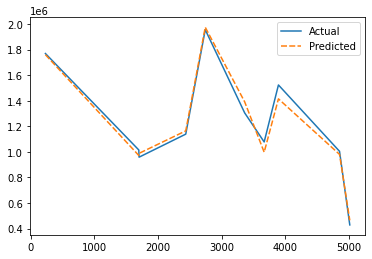

In [93]:
y_test_preds = rf.predict(X_test).round(3)

df1 = pd.DataFrame({'Actual': y_test, 'Predicted' : y_test_preds})
df2 = df1.head(10)
sns.lineplot(data = df2)

In [94]:
y_target = wal['weekly_sales']
X_data = wal.drop(['weekly_sales'], axis=1, inplace=False)
y_target2 = wal2[['weekly_sales']]

In [111]:
wal2.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [120]:
y_target2 = wal2['Weekly_Sales']

In [95]:
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_data, y_target)

RandomForestRegressor(random_state=42)

In [101]:
print(X_data)

      store                 date  holiday_flag  temperature  fuel_price  \
0         1  1265328000000000000             0        42.31       2.572   
1         1  1265932800000000000             1        38.51       2.548   
2         1  1266537600000000000             0        39.93       2.514   
3         1  1267142400000000000             0        46.63       2.561   
4         1  1267747200000000000             0        46.50       2.625   
...     ...                  ...           ...          ...         ...   
6430     45  1348790400000000000             0        64.88       3.997   
6431     45  1349395200000000000             0        64.89       3.985   
6432     45  1350000000000000000             0        54.47       4.000   
6433     45  1350604800000000000             0        56.47       3.969   
6434     45  1351209600000000000             0        58.85       3.882   

             cpi  unemployment date_year date_month date_day  week  
0     211.096358         8.106

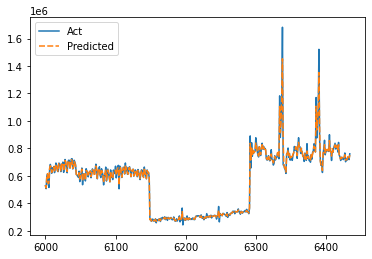

In [116]:
y_test_preds = rf.predict(X_data).round(3)

df1 = pd.DataFrame({'Act' : y_target, 'Predicted' : y_test_preds})
df2 = df1[6000:]
sns.lineplot(data = df2)

In [127]:
print(rf2.score(X_data,y_target))

0.9962029203536309


In [128]:
print(rf.score(X_data,y_target))

0.9961182601379385


In [130]:
print(rf3.score(X_data,y_target))

0.9961394275483445


In [132]:
print(rf4.score(X_data,y_target))

0.9960271877433505


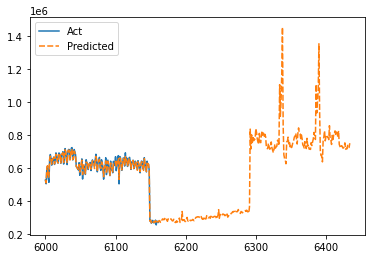

In [121]:
y_test_preds = rf.predict(X_data).round(3)

df1 = pd.DataFrame({'Act' : y_target2, 'Predicted' : y_test_preds})
df2 = df1[6000:]
sns.lineplot(data = df2)

In [32]:
cross_scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * cross_scores)
avg_rmse = np.mean(rmse_scores) 

print('Random Forest 모델의 훈련 데이터에 대한 성능 :')
print('5 folds의 개별 RMSE : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f} '.format(avg_rmse))

Random Forest 모델의 훈련 데이터에 대한 성능 :
5 folds의 개별 RMSE :  [125999.48 106093.93 111369.83 105810.66  97315.4 ]
5 folds의 평균 RMSE : 109317.861 


In [35]:
from sklearn.model_selection import GridSearchCV 

In [33]:
rf_param_grid = {'n_estimators': [100, 200, 300, 400, 500],
                 'max_depth': [4, 5, 6]
                 }

In [36]:
rf_grid = GridSearchCV(rf, param_grid=rf_param_grid, scoring='neg_mean_squared_error', n_jobs=-1) 

In [37]:
rf_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [38]:
print('최고 평균 정확도(RMSE) : {0:.3f}'.format(np.sqrt(-1*rf_grid.best_score_)))
print('최고의 파라미터 : {}'.format(rf_grid.best_params_))

최고 평균 정확도(RMSE) : 252376.232
최고의 파라미터 : {'max_depth': 6, 'n_estimators': 100}


In [28]:
feature_series = pd.Series(data=rf1.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False) 

In [29]:
feature_series.head()

store           0.665431
cpi             0.147850
unemployment    0.104317
week            0.043333
date_day        0.011511
dtype: float64

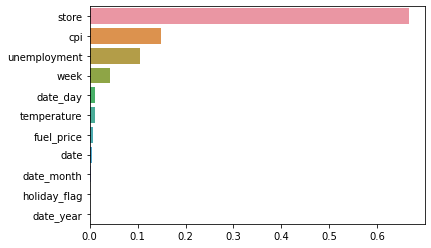

In [30]:
sns.barplot(x = feature_series, y = feature_series.index)

In [ ]:
for i in wal.columns:
    sns.distplot(wal[i],bins = 30)
    plt.show()

In [75]:
wal.drop(['weekly_sales'],axis = 1).columns


Index(['store', 'date', 'holiday_flag', 'temperature', 'fuel_price', 'cpi',
       'unemployment', 'date_year', 'date_month', 'date_day', 'week'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


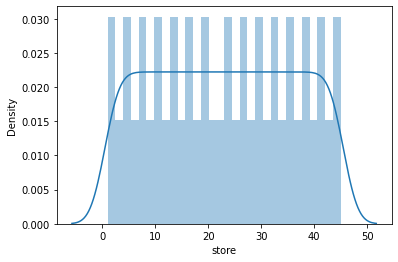

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


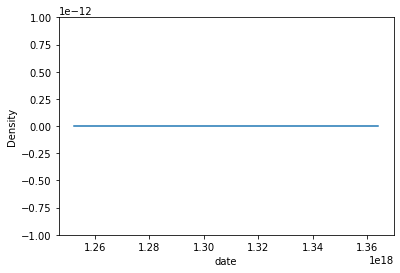

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


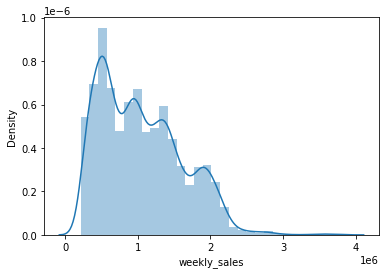

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


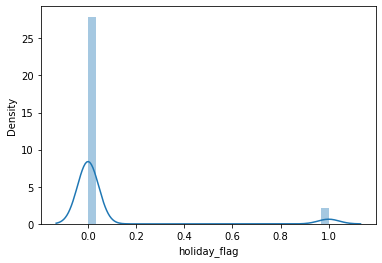

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


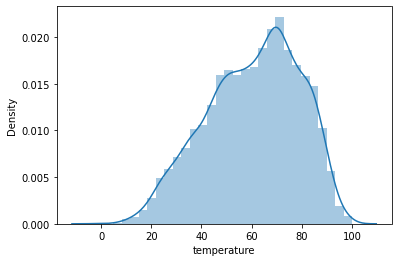

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


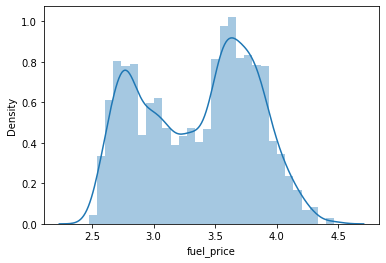

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


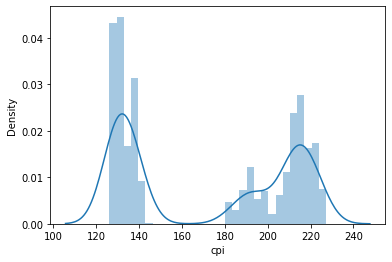

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


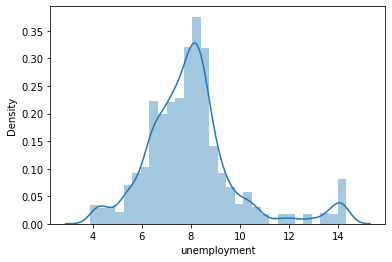

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


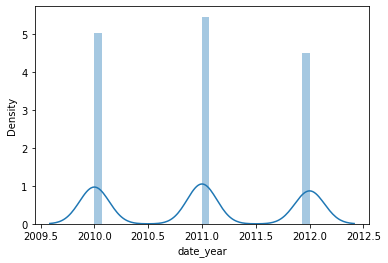

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


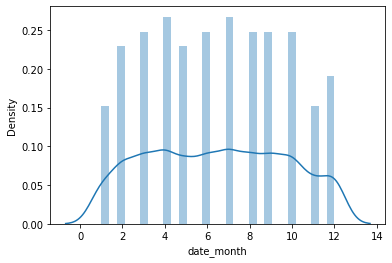

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


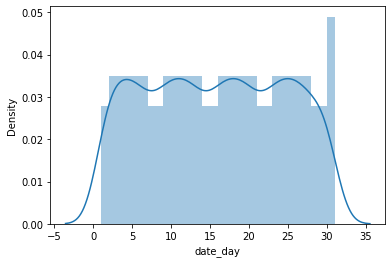

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


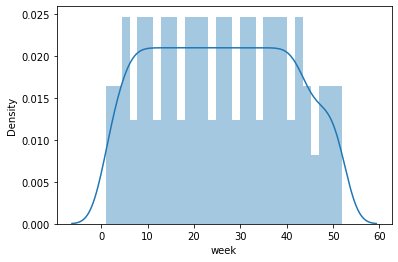

In [81]:
for i in wal.columns:
    sns.distplot(wal[i],bins  = 30)
    plt.show()

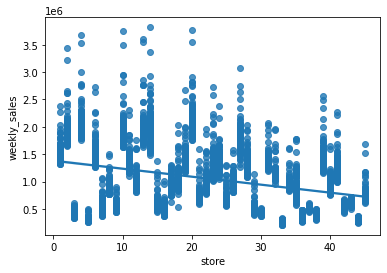

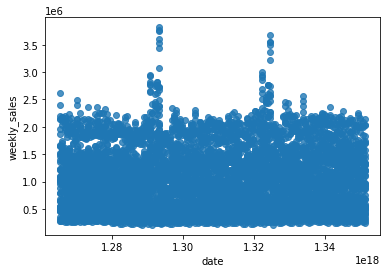

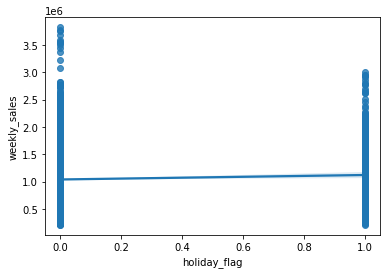

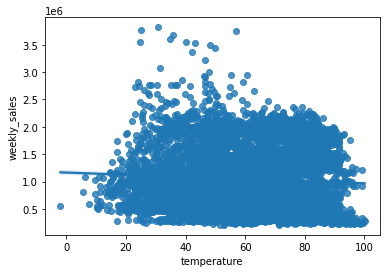

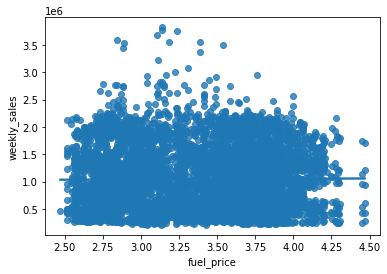

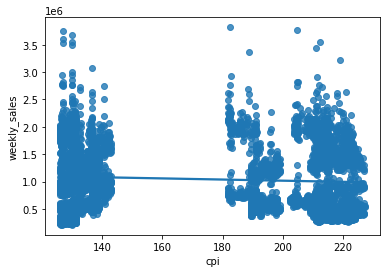

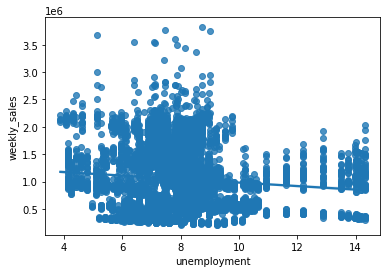

UFuncTypeError: ignored

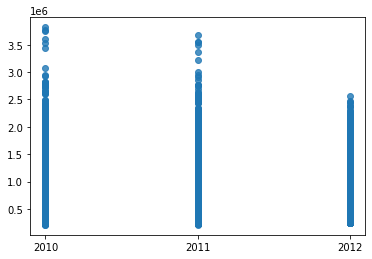

In [80]:
for i in wal.drop(['weekly_sales'],axis = 1).columns:
    sns.regplot(x = i, y = 'weekly_sales',data = wal)
    plt.show()

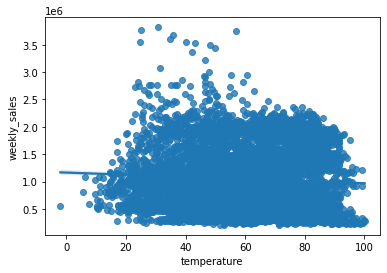

In [51]:
sns.regplot(x = 'temperature', y = 'weekly_sales',data = wal)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [83]:
y_target = wal['unemployment']
X_data = wal[['temperature']]


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state=42)

In [85]:
model = LinearRegression()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


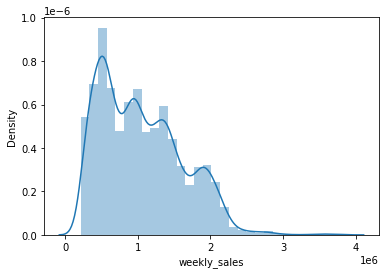

In [73]:
sns.distplot(wal['weekly_sales'],bins = 30)

In [86]:
model.fit(X_train, y_train)

LinearRegression()

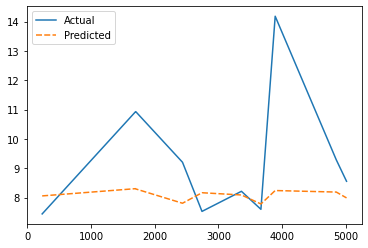

In [87]:
y_test_preds = model.predict(X_test).round(3)

df1 = pd.DataFrame({'Actual': y_test, 'Predicted' : y_test_preds})
df2 = df1.head(10)
sns.lineplot(data = df2)

In [89]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.01100073173609728
0.0071155319116399385


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state=42)

##4.EDA & Visualization

* 년,월 판매량의 추세는 어떻게 될까?

In [ ]:
#년,월에 대한 평균 판매량
pd.DataFrame(wal.groupby(['date_year','date_month'])['weekly_sales'].mean().round(3))

weekly_sales
date_year date_month              
2010      02           1057405.461
          03           1010665.569
          04           1028499.414
          05           1037282.969
          06           1068034.291
          07           1033689.449
          08           1042445.060
          09            984821.646
          10            965163.662
          11           1126963.167
          12           1283380.145
2011      01            909466.482
          02           1035174.044
          03            996424.713
          04           1006784.493
          05           1009156.434
          06           1054296.584
          07           1021828.439
          08           1047774.068
          09            981545.504
          10           1018118.240
          11           1167568.638
          12           1280347.122
2012      01            938302.620
          02           1067019.886
          03           1028931.780
          04           1049560.589
          05           1048702.664
          06           1069379.241
          07           1041719.180
          08           1052670.070
          09           1003586.358
          10           1024231.558

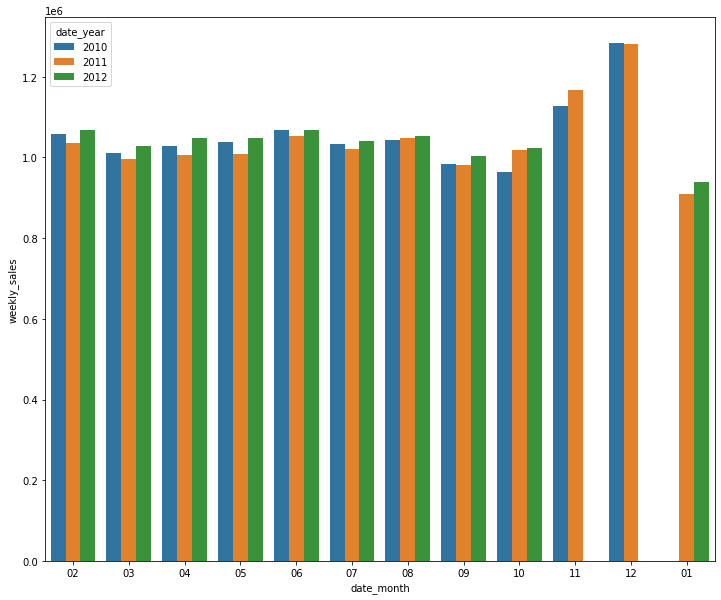

In [ ]:
#평균판매량을 시각화 해보자
f,ax = plt.subplots(1,1,figsize = (12,10))
a = wal.groupby(['date_year','date_month'])['weekly_sales'].mean().round(3).reset_index()
sns.barplot(data = a, x = 'date_month',y = 'weekly_sales',hue = 'date_year')

# 대체적으로 11월, 12월에 판매량이 급등을 하고있다.

In [ ]:
#왜 12월에 판매량이 급등을 할까?
# 12월 매장별 평균판매량을 보자
wal[wal['date_month'] == '12'].groupby(['store'])['weekly_sales'].mean().sort_values(ascending = False).head(10)
# 20번 매장과 4번 매장에서 가장 높은 평균판매량을 가졌다.

store
20    2676012.493
4     2561152.081
14    2555551.604
10    2540211.605
13    2538795.462
2     2396695.096
27    2131043.572
6     1966302.455
23    1900113.749
19    1821636.386
Name: weekly_sales, dtype: float64

In [ ]:
wal[wal['date_month'] == '12'].corr().round(3)

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,week
store,1.000,-0.340,-0.000,-0.031,0.124,-0.209,0.218,0.000
weekly_sales,-0.340,1.000,-0.208,-0.096,0.075,-0.075,-0.137,0.043
holiday_flag,-0.000,-0.208,1.000,-0.124,0.001,0.002,-0.000,0.707
temperature,-0.031,-0.096,-0.124,1.000,-0.090,0.313,0.221,-0.138
fuel_price,0.124,0.075,0.001,-0.090,1.000,-0.423,0.106,0.013
cpi,-0.209,-0.075,0.002,0.313,-0.423,1.000,-0.283,0.002
unemployment,0.218,-0.137,-0.000,0.221,0.106,-0.283,1.000,0.000
week,0.000,0.043,0.707,-0.138,0.013,0.002,0.000,1.000


In [ ]:
# 20번 매장에 12월 매출을 보면
wal[(wal['date_month'] == '12') &(wal['store'] == 20)]

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,date_year,date_month,date_day,week
2760,20,2010-12-03,2416051.17,0,35.47,3.046,204.824919,7.484,2010,12,03,48
2761,20,2010-12-10,2752122.08,0,24.27,3.109,204.687738,7.484,2010,12,10,49
2762,20,2010-12-17,2819193.17,0,24.07,3.140,204.632119,7.484,2010,12,17,50
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484,2010,12,24,51
2764,20,2010-12-31,1799737.79,1,28.85,3.179,204.643227,7.484,2010,12,31,52
2812,20,2011-12-02,2298776.83,0,46.32,3.452,211.639431,7.082,2011,12,02,48
2813,20,2011-12-09,2546123.78,0,41.64,3.415,211.866786,7.082,2011,12,09,49
2814,20,2011-12-16,2762816.65,0,37.16,3.413,212.068504,7.082,2011,12,16,50
2815,20,2011-12-23,3555371.03,0,40.19,3.389,212.236040,7.082,2011,12,23,51
2816,20,2011-12-30,2043245.00,1,36.35,3.389,212.403576,7.082,2011,12,30,52


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


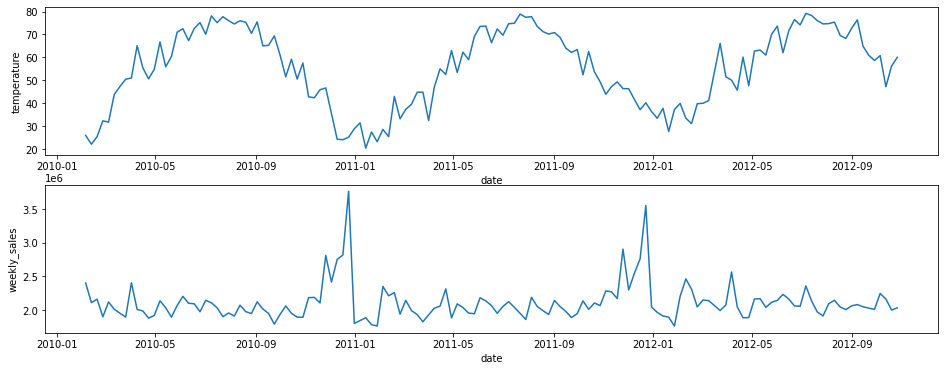

In [ ]:
# 온도 때문인지 확인 하기 위해 20번 매장에 일년 평균 온도를 확인해 보면

f,ax = plt.subplots(2,1,figsize = (16,6))
sns.lineplot(wal[wal['store'] == 20]['date'],wal[wal['store'] == 20]['temperature'],ax =ax[0])
sns.lineplot(wal[wal['store'] == 20]['date'],wal[wal['store'] == 20]['weekly_sales'],ax = ax[1])

In [ ]:
#다른 매장도 쉽게 알아보기 위해 함수를 생성해보면
def tem_sales(x):
    f,ax = plt.subplots(2,1,figsize = (16,6))
    sns.lineplot(wal[wal['store'] == x]['date'],wal[wal['store'] == x]['temperature'],ax =ax[0])
    sns.lineplot(wal[wal['store'] == x]['date'],wal[wal['store'] == x]['weekly_sales'],ax = ax[1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


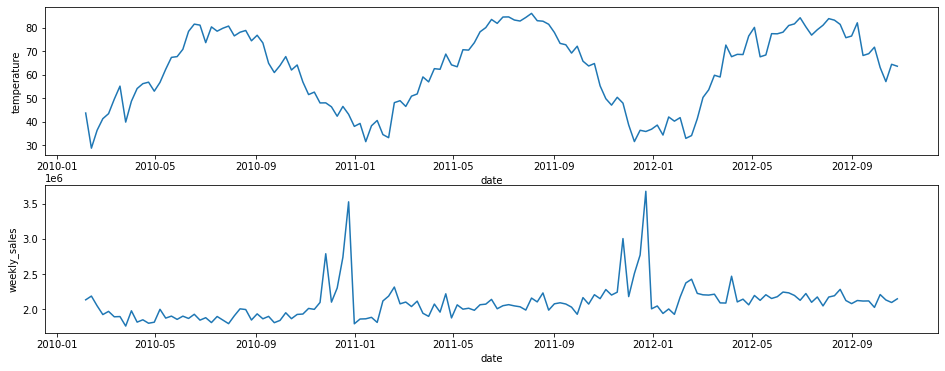

In [ ]:
#4번 매장도 확인해 보면
tem_sales(4)
# 온도가 내려갈수록 판매량이 높아지고 있는다는 걸 보인다.
# 이곳은 사계절이 뚜렷해서 겨울대비를 하기위해 겨울물품 판매량이 증가하는 것으로 보인다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

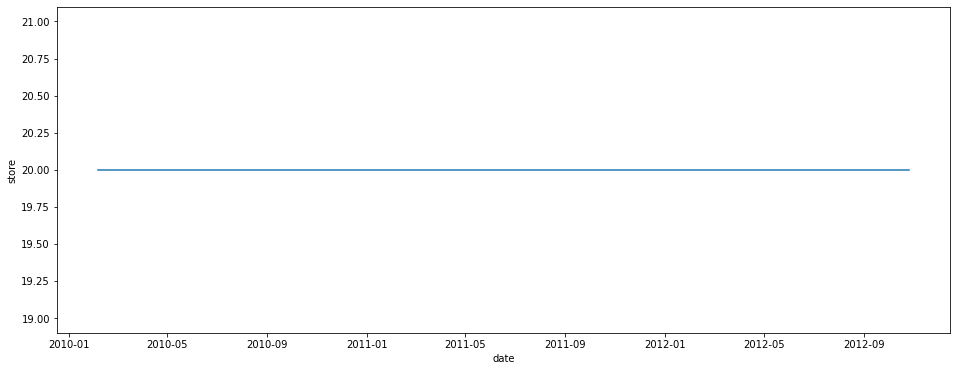

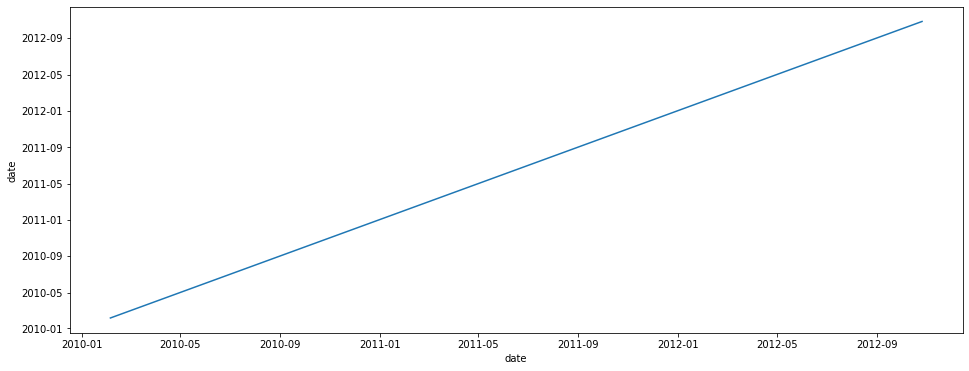

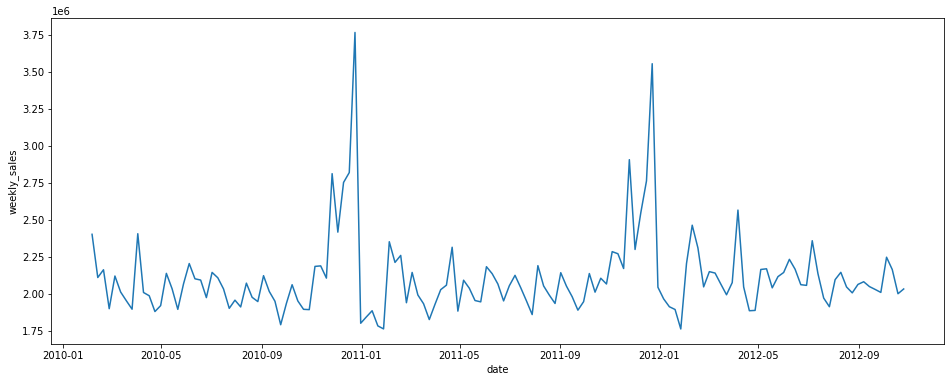

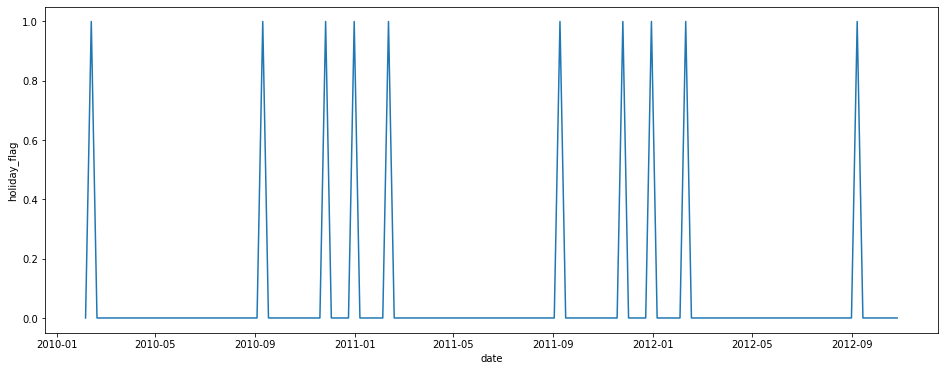

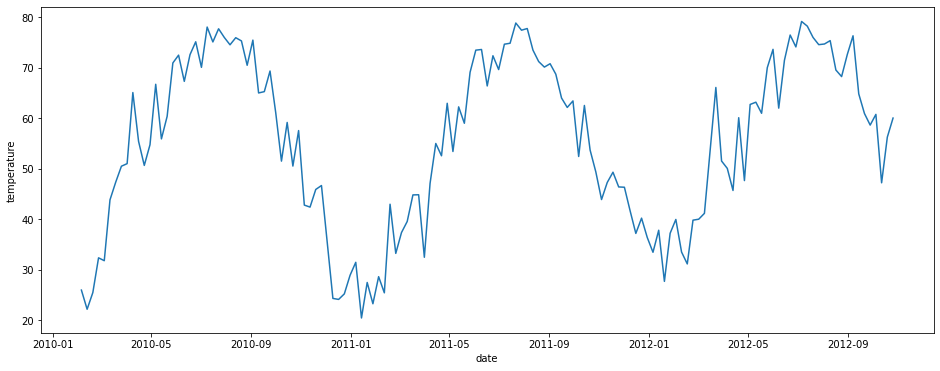

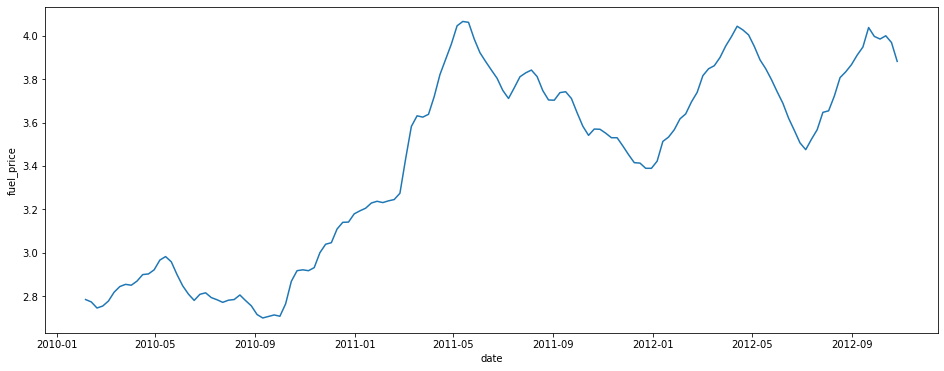

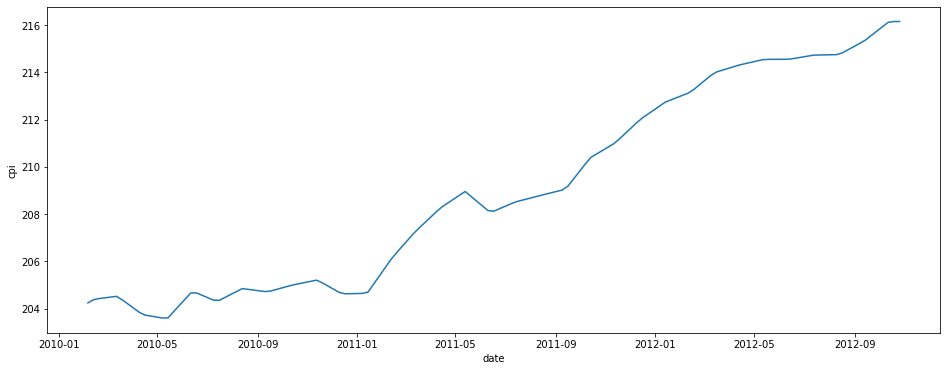

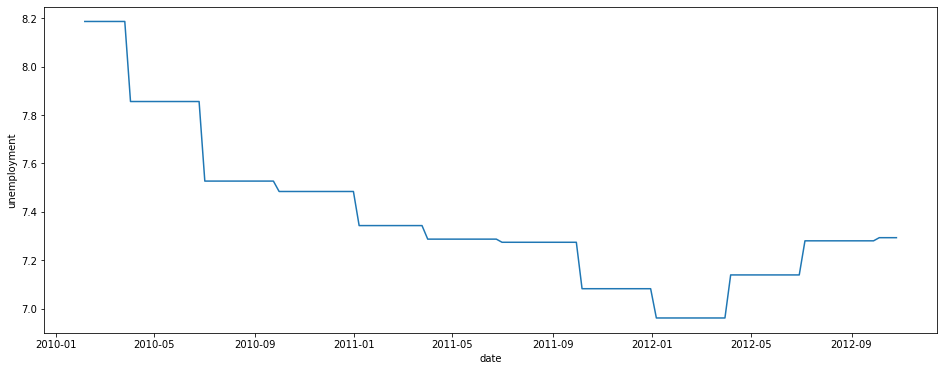

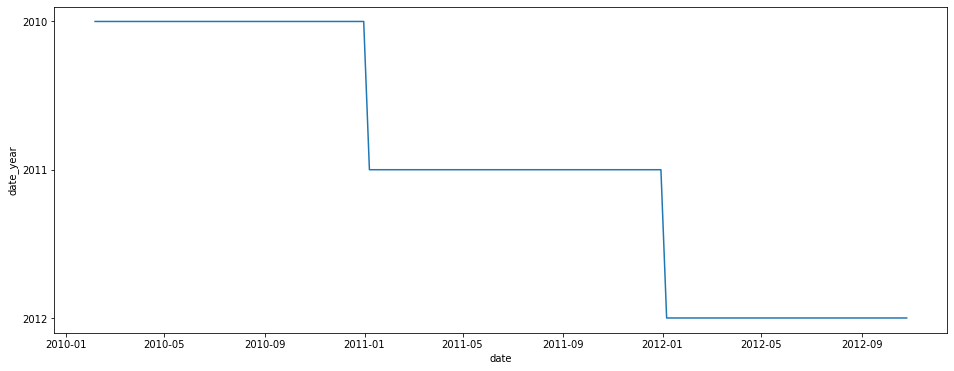

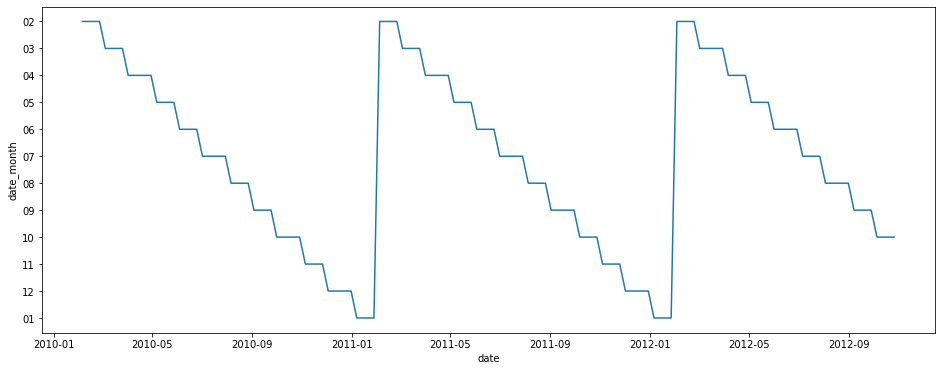

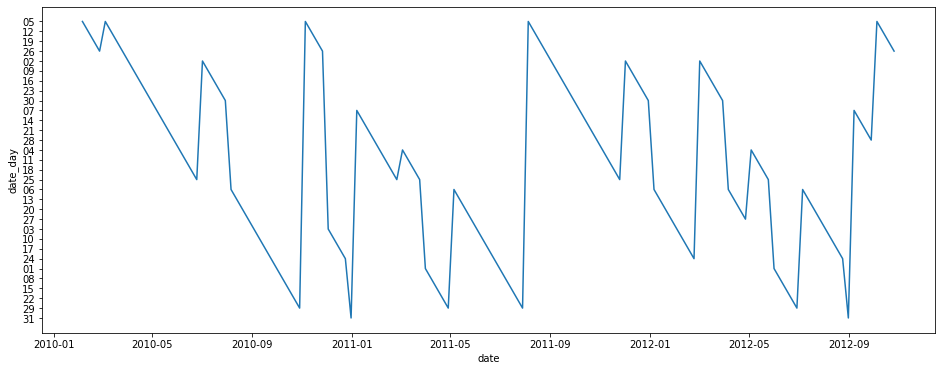

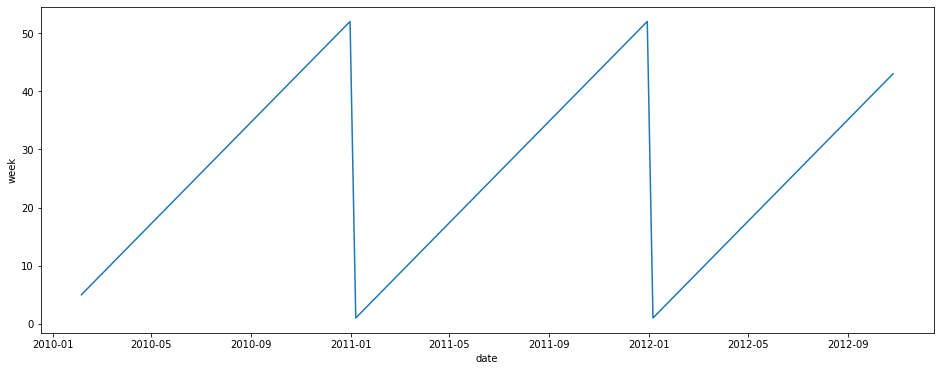

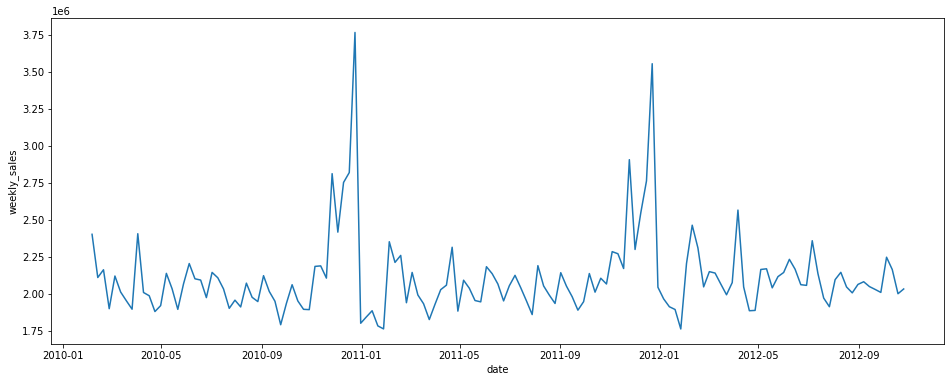

In [ ]:
# 다른 컬럼과도 연관이 있나 전부살펴본 결과 
for i in wal.columns:
    f,ax = plt.subplots(1,1,figsize = (16,6))
    sns.lineplot(wal[wal['store'] == 20]['date'],wal[wal['store'] == 20][i])
f,ax = plt.subplots(1,1,figsize = (16,6))
sns.lineplot(wal[wal['store'] == 20]['date'],wal[wal['store'] == 20]['weekly_sales']);
# 11월 12월에만 판매량이 몰리는 것 이외에 영향을 주는 것을 찾을 수 없다.

* 매장별 평균판매량 순위가 어떻게 될까?

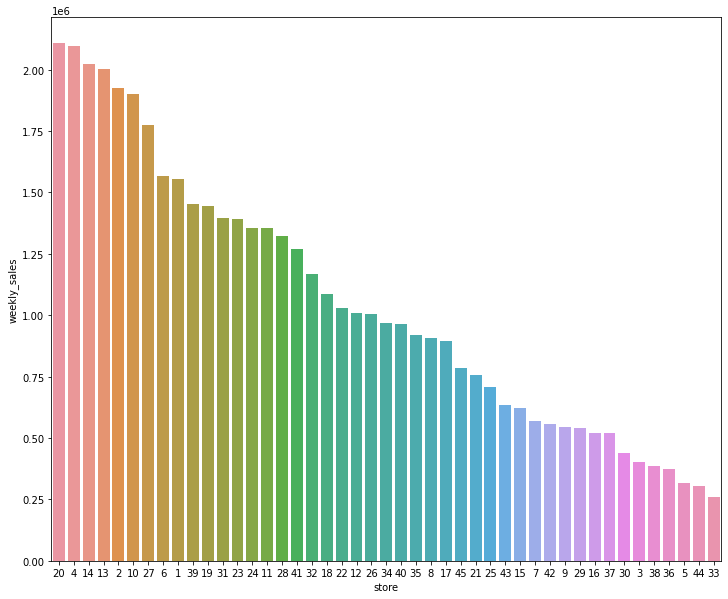

In [ ]:
# 매장별  평균판매량을 시각화해서 보면
plt.figure(figsize = (12,10))
a = wal.groupby(['store'])['weekly_sales'].mean().round(3).reset_index()
sns.barplot(data = a, x = 'store',y = 'weekly_sales',order = a.sort_values('weekly_sales',ascending = False).store)
# 20번 매장과, 4번 매장이 매출이 가장 높다.

* 기온에 따라 기름값은 어떤 관계가 있을까?

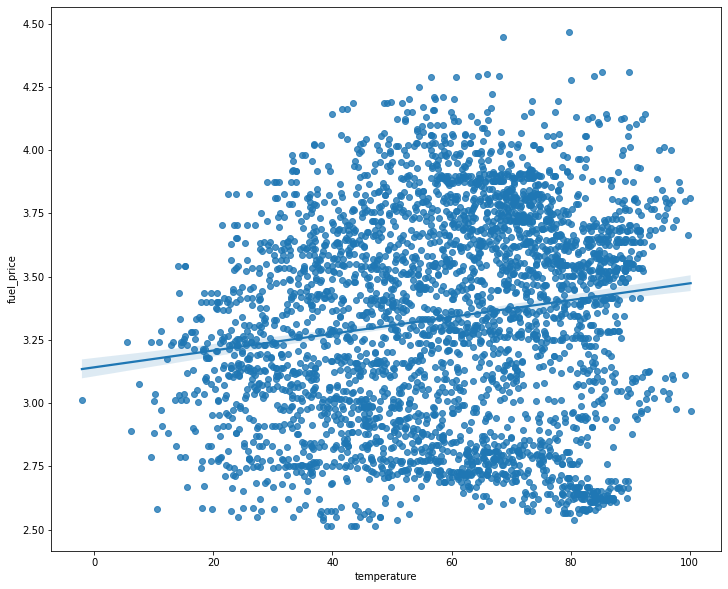

In [43]:
plt.figure(figsize = (12,10))
b = wal.groupby(['temperature'])['fuel_price'].mean().round(3).reset_index()
sns.regplot(data = b, x = 'temperature',y = 'fuel_price',fit_reg = True)

In [ ]:
wal.groupby(['temperature'])['fuel_price'].mean().round(3).reset_index().describe()

,temperature,fuel_price
count,3528.000000,3528.000000
mean,58.805652,3.337105
std,19.725844,0.415757
min,-2.060000,2.514000
25%,44.085000,2.984750
50%,60.635000,3.370500
75%,74.325000,3.668000
max,100.140000,4.468000


* 휴일이 있던 주와 없던 주에 판매량은 얼마나 증가하였나?

In [ ]:
#휴일이 있던 주에 평균 판매량
wal[wal['holiday_flag'] == 1]['weekly_sales'].mean()

1122887.8923555557

In [ ]:
#휴일이 없던 주에 평균 판매량
wal[wal['holiday_flag'] == 0]['weekly_sales'].mean()

1041256.3802088555

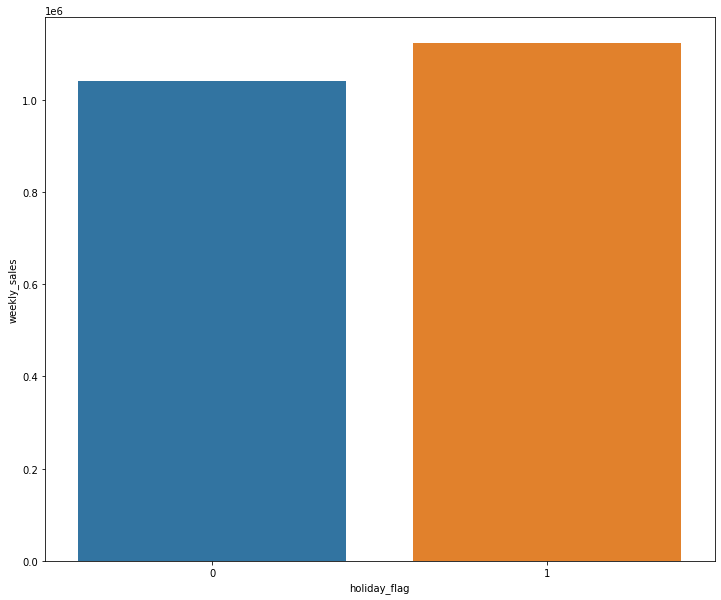

In [ ]:
#평균 판매량을 그래프로 나타내보자
plt.figure(figsize = (12,10))
c = wal.groupby(['holiday_flag'])['weekly_sales'].mean().round(3).reset_index()
sns.barplot(data = c, x = 'holiday_flag',y = 'weekly_sales')

In [ ]:
print("휴일이 있던 주의 판매량은 휴일이 없던주에 판매량에 비해 {:.2f}% 증가하였다".format((1-wal[wal['holiday_flag']== 0]['weekly_sales'].mean()/wal[wal['holiday_flag']== 1]['weekly_sales'].mean())*100))

휴일이 있던 주의 판매량은 휴일이 없던주에 판매량에 비해 7.27% 증가하였다


* 실업률에 대한 매출변화는 어떠한가?

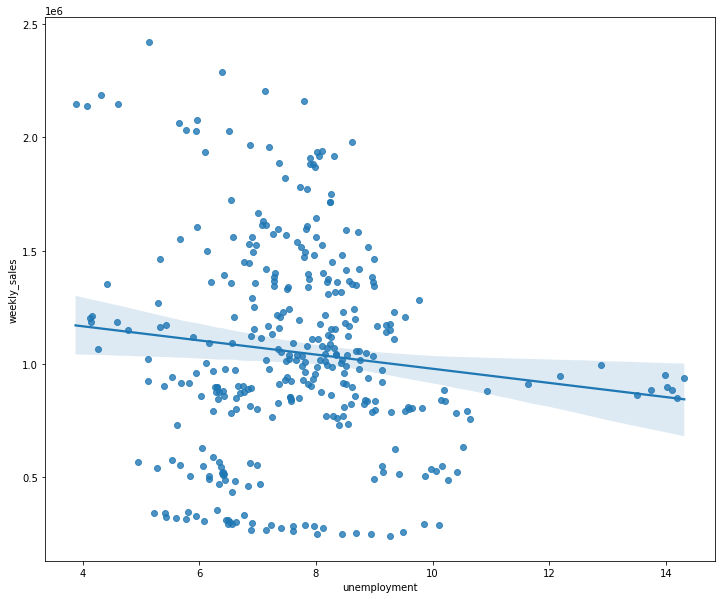

In [44]:
plt.figure(figsize = (12,10))
c = wal.groupby(['unemployment'])['weekly_sales'].mean().round(3).reset_index()
sns.regplot(data = c, x = 'unemployment',y = 'weekly_sales',fit_reg = True)

* 각 컬럼에 대한 상관계수 구하기

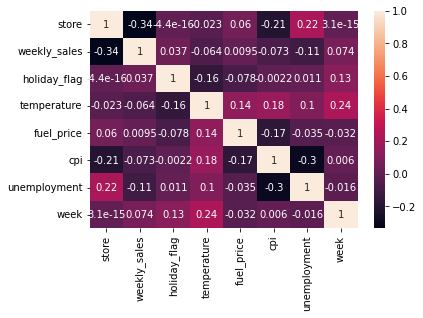

In [ ]:
sns.heatmap(wal.corr(),annot = True,fmt = '.2g')

##5.Review

* Walmart Sales Dataset of 45stores 데이터는:  
총 데이터 수 :  51480
총 결측치 수 : 0 = 전체 데이터의 0.00% 
중복 데이터의 수는 : 0
* 년, 월 판매량의 추세는 어떻게 될까?
  : 판매량이 11월,12월에만 집중적으로 몰려 있다, 그외 영향을 주는 컬럼은 찾을 수 없다.
* 매장별 평균판매량 순위가 어떻게 될까?
  : 20번 매장과 4번 매장이 매출이 가장 높다.
* 기온에 따라 기름값은 어떤 관계가 있을까?
  : 평균 기름값은 3.33달러이고 기온에따라 관계가 있다고 말할수 없다
* 휴일이 있던 주와 없던 주에 판매량은 얼마낮 증가하였나?
  : 휴일이 있던 주의 판매량은 휴일이 없던주에 판매량에 비해 7.27% 증가하였다
* 실업률에 대한 매출변화는 어떠한가?
  : 실업률과 매출변화는 관계가 없다.
* 각 컬럼에 대한 상관계수 구하기
  : 데이터의 양과, 컬럼의 종류가 적어 컬럼별 강한 상관관계를 갖는 상관계수를 찾을 수 없다.